<a href="https://colab.research.google.com/github/IlyaDenisov88/dataenj/blob/main/dataenj_valuable/API_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Яндекс погода

In [2]:
import requests

access_key = '1c1a83eb-9915-4249-9ff9-9f2aab7cb46a'

headers = {
    'X-Yandex-Weather-Key': access_key
}

response = requests.get('https://api.weather.yandex.ru/v2/forecast?lat=52.37125&lon=4.89388', headers=headers)

print(response.json())

{'now': 1728023103, 'now_dt': '2024-10-04T06:25:03.051268Z', 'info': {'n': True, 'url': 'https://yandex.ru/pogoda/?lat=52.37125&lon=4.89388', 'lat': 52.37125, 'lon': 4.89388, 'tzinfo': {'name': 'Europe/Amsterdam', 'abbr': 'CEST', 'dst': True, 'offset': 7200}, 'def_pressure_mm': 759, 'def_pressure_pa': 1011, 'zoom': 10, 'nr': True, 'ns': True, 'nsr': True, 'p': False, 'f': True, '_h': False}, 'fact': {'daytime': 'd', 'obs_time': 1728021600, 'season': 'autumn', 'source': 'station', 'uptime': 1728023103, 'cloudness': 0, 'condition': 'clear', 'feels_like': 6, 'humidity': 100, 'icon': 'skc_d', 'is_thunder': False, 'phenom_condition': 'fog', 'phenom_icon': 'fg_d', 'polar': False, 'prec_prob': 0, 'prec_strength': 0, 'prec_type': 0, 'pressure_mm': 766, 'pressure_pa': 1021, 'temp': 7, 'uv_index': 0, 'visibility': 100, 'temp_water': 16, 'wind_angle': 0, 'wind_dir': 'c', 'wind_gust': 2.5, 'wind_speed': 0}, 'forecasts': [{'date': '2024-10-04', 'date_ts': 1727992800, 'week': 40, 'sunrise': '07:46',

Начнем с простых примеров. Этот пример показывает, как получить прогноз погоды на несколько дней.


In [3]:
import requests

def get_weather_forecast(city):
    api_key = "1c1a83eb-9915-4249-9ff9-9f2aab7cb46a"  # Замените на ваш ключ API Яндекс.Погоды
    url = "https://api.weather.yandex.ru/v2/forecast"

    headers = {
        "X-Yandex-API-Key": api_key
    }

    # Координаты города, например, Санкт-Петербург: lat=59.9342802, lon=30.3350986
    params = {
        "lat": 59.9342802,
        "lon": 30.3350986,
        "lang": "ru_RU",
        "limit": 3  # Прогноз на 3 дня
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    if response.status_code == 200:
        forecasts = data['forecasts']
        forecast_texts = []

        for forecast in forecasts:
            date = forecast['date']
            day_temp = forecast['parts']['day']['temp_avg']
            night_temp = forecast['parts']['night']['temp_avg']
            condition = forecast['parts']['day']['condition']
            forecast_texts.append(f"{date}: Днем {day_temp}°C, ночью {night_temp}°C, условия: {condition}.")

        return "Прогноз погоды:\n" + "\n".join(forecast_texts)
    else:
        return "Не удалось получить данные о прогнозе погоды."

print(get_weather_forecast("Санкт-Петербург"))

Прогноз погоды:
2024-10-04: Днем 9°C, ночью 9°C, условия: light-rain.
2024-10-05: Днем 11°C, ночью 5°C, условия: cloudy.
2024-10-06: Днем 12°C, ночью 8°C, условия: cloudy.


Боевой пример

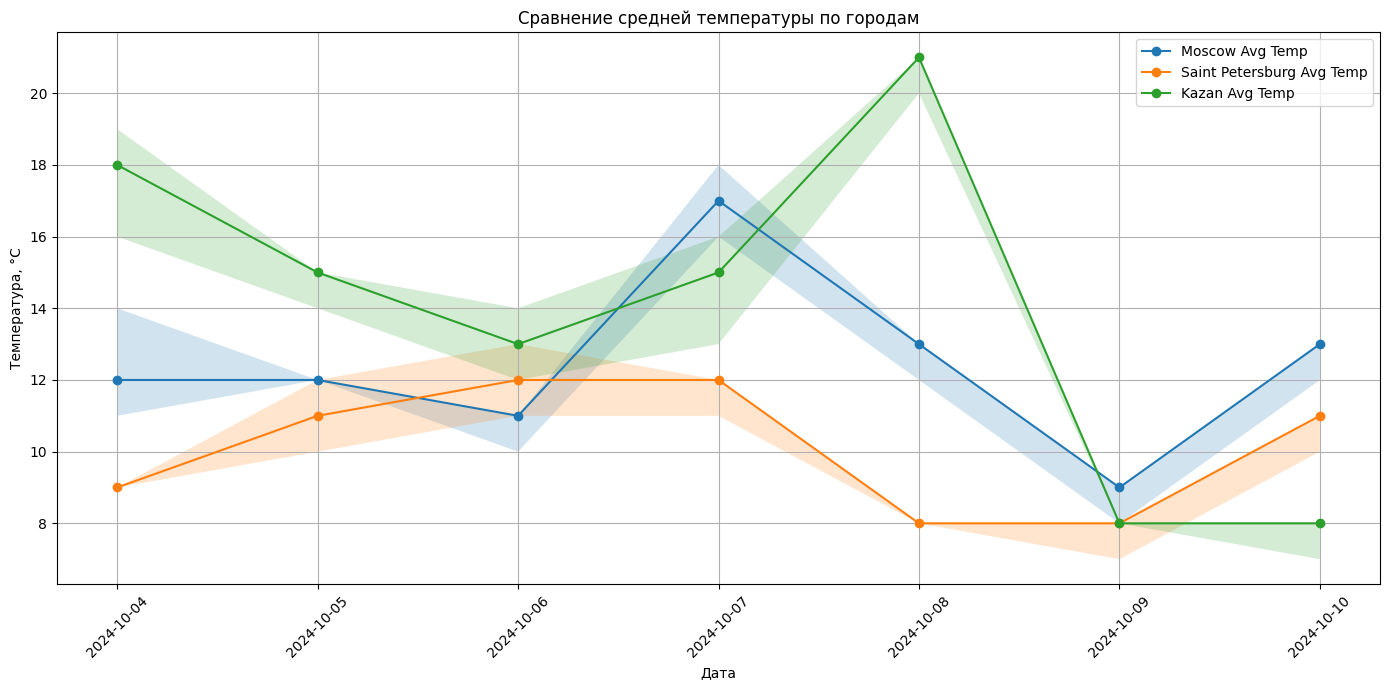

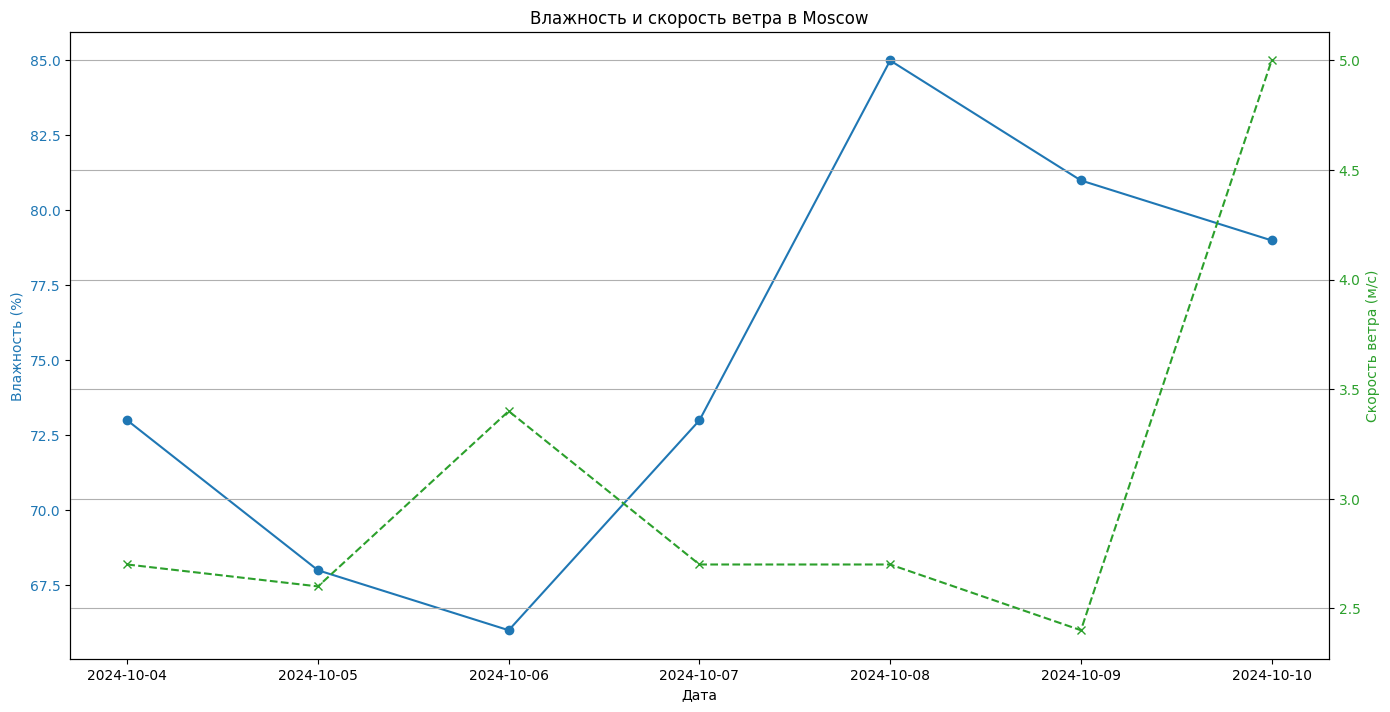

In [5]:
import requests
import matplotlib.pyplot as plt


def fetch_weather_data(lat, lon, api_key):
    url = f"https://api.weather.yandex.ru/v2/forecast?lat={lat}&lon={lon}&limit=7&hours=false"
    headers = {
        'X-Yandex-API-Key': api_key
    }
    response = requests.get(url, headers=headers)
    data = response.json()
    return data


def extract_weather_info(weather_data):
    dates = []
    avg_temperatures = []
    min_temperatures = []
    max_temperatures = []
    humidity = []
    wind_speed = []

    for forecast in weather_data['forecasts']:
        date = forecast['date']
        temp_avg = forecast['parts']['day']['temp_avg']
        temp_min = forecast['parts']['day']['temp_min']
        temp_max = forecast['parts']['day']['temp_max']
        hum = forecast['parts']['day']['humidity']
        wind = forecast['parts']['day']['wind_speed']

        dates.append(date)
        avg_temperatures.append(temp_avg)
        min_temperatures.append(temp_min)
        max_temperatures.append(temp_max)
        humidity.append(hum)
        wind_speed.append(wind)

    return dates, avg_temperatures, min_temperatures, max_temperatures, humidity, wind_speed


def plot_temperature_comparison(city_weather_info):
    plt.figure(figsize=(14, 7))

    for city, (dates, avg_temp, min_temp, max_temp, hum, wind) in city_weather_info.items():
        plt.plot(dates, avg_temp, marker='o', label=f'{city} Avg Temp')
        plt.fill_between(dates, min_temp, max_temp, alpha=0.2)

    plt.title('Сравнение средней температуры по городам')
    plt.xlabel('Дата')
    plt.ylabel('Температура, °C')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_humidity_and_wind(city_weather_info, city):
    dates, avg_temp, min_temp, max_temp, humidity, wind_speed = city_weather_info[city]

    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:blue'
    ax1.set_xlabel('Дата')
    ax1.set_ylabel('Влажность (%)', color=color)
    ax1.plot(dates, humidity, color=color, marker='o', label='Влажность')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Скорость ветра (м/с)', color=color)
    ax2.plot(dates, wind_speed, color=color, marker='x', linestyle='--', label='Скорость ветра')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(f'Влажность и скорость ветра в {city}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


api_key = '1c1a83eb-9915-4249-9ff9-9f2aab7cb46a' # МЕНЯЙТЕ НА СВОЙ API, ЭТОТ НЕРАБОЧИЙ
cities = {
    'Moscow': (55.7558, 37.6176),
    'Saint Petersburg': (59.9343, 30.3351),
    'Kazan': (55.7963, 49.1088)
}

weather_data = {city: fetch_weather_data(lat, lon, api_key) for city, (lat, lon) in cities.items()}
city_weather_info = {city: extract_weather_info(data) for city, data in weather_data.items()}

# Сравнение средней температуры по городам
plot_temperature_comparison(city_weather_info)

# Влажность и скорость ветра для Москвы
plot_humidity_and_wind(city_weather_info, 'Moscow')


Что делает код:
*  Функция `fetch_weather_data(lat, lon, api_key)` отправляет запрос к API Яндекс.Погоды, чтобы получить прогноз погоды на 7 дней для заданных координат (широты и долготы). Данные запрашиваются в формате JSON и возвращаются в виде словаря Python.
*  Функция `extract_weather_info(weather_data)` обрабатывает данные о погоде, полученные от API. Она извлекает даты, среднюю, минимальную и максимальную температуру, влажность и скорость ветра для каждого дня прогноза и сохраняет их в списки.
*  Функция `plot_temperature_comparison(city_weather_info)` создает график, сравнивающий среднюю температуру по городам за 7-дневный период. Для каждого города строится линия, представляющая среднюю температуру, а также закрашенная область, показывающая диапазон между минимальной и максимальной температурой.
*  Функция `plot_humidity_and_wind(city_weather_info, city`) создает график, отображающий изменение влажности и скорости ветра для конкретного города (в данном случае Москвы) в течение 7-дневного периода. Влажность отображается на основной оси Y, а скорость ветра — на дополнительной оси Y.

Средние значения по городам:
              city   temp_avg           humidity wind_speed
                         mean min max       mean       mean
0           Казань  14.000000   8  21  56.285714   3.600000
1           Москва  12.428571   9  17  75.142857   3.071429
2  Санкт-Петербург  10.142857   8  12  74.428571   4.271429

Самый жаркий день:
city              Казань
date          2024-10-08
temp_avg              21
temp_min              20
temp_max              21
humidity              46
wind_speed           3.0
condition       overcast
Name: 18, dtype: object

Самый холодный день:
city          Санкт-Петербург
date               2024-10-08
temp_avg                    8
temp_min                    8
temp_max                    8
humidity                   70
wind_speed                3.5
condition            overcast
Name: 11, dtype: object

Дни с дождем:
Empty DataFrame
Columns: [city, date, temp_avg, temp_min, temp_max, humidity, wind_speed, condition]
Index: []


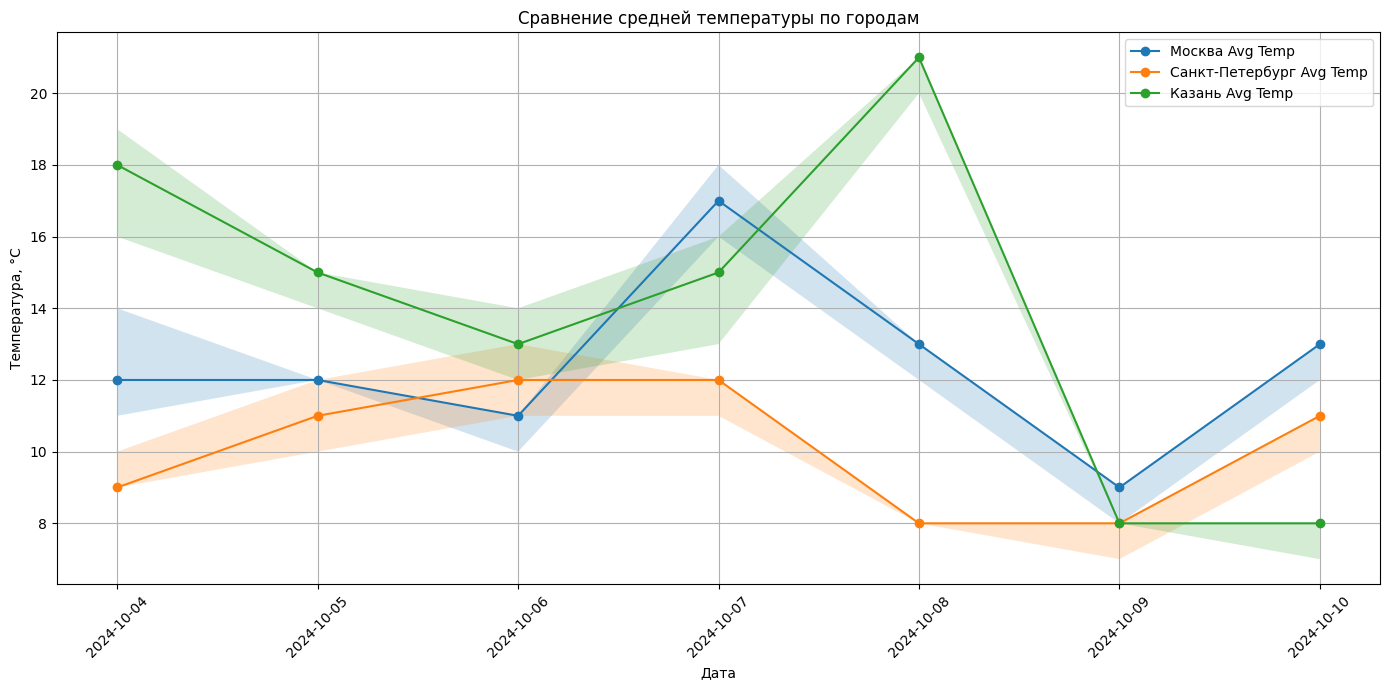

In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_weather_data(lat, lon, api_key):
    """
    Функция для получения данных о погоде от API Яндекс.Погоды.
    """
    url = f"https://api.weather.yandex.ru/v2/forecast?lat={lat}&lon={lon}&limit=7&hours=false"
    headers = {
        'X-Yandex-API-Key': api_key
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Ошибка при получении данных: {response.status_code} - {response.text}")
        return None

def parse_weather_data(data, city_name):
    """
    Функция для преобразования данных о погоде в DataFrame.
    """
    forecasts = data['forecasts']
    parsed_data = []

    for forecast in forecasts:
        date = forecast['date']
        temp_avg = forecast['parts']['day']['temp_avg']
        temp_min = forecast['parts']['day']['temp_min']
        temp_max = forecast['parts']['day']['temp_max']
        humidity = forecast['parts']['day']['humidity']
        wind_speed = forecast['parts']['day']['wind_speed']
        condition = forecast['parts']['day']['condition']

        parsed_data.append({
            "city": city_name,
            "date": date,
            "temp_avg": temp_avg,
            "temp_min": temp_min,
            "temp_max": temp_max,
            "humidity": humidity,
            "wind_speed": wind_speed,
            "condition": condition
        })

    df = pd.DataFrame(parsed_data)
    return df

def analyze_weather_data(df):
    """
    Функция для выполнения анализа данных о погоде.
    """
    # Группировка данных по городам и расчет среднего значения температуры, влажности и скорости ветра
    summary = df.groupby('city').agg({
        'temp_avg': ['mean', 'min', 'max'],
        'humidity': 'mean',
        'wind_speed': 'mean'
    }).reset_index()

    print("Средние значения по городам:")
    print(summary)

    # Поиск дней с самой высокой и низкой средней температурой
    hottest_day = df.loc[df['temp_avg'].idxmax()]
    coldest_day = df.loc[df['temp_avg'].idxmin()]

    print("\nСамый жаркий день:")
    print(hottest_day)

    print("\nСамый холодный день:")
    print(coldest_day)

    # Фильтрация дней с дождем
    rainy_days = df[df['condition'].str.contains('дождь')]
    print("\nДни с дождем:")
    print(rainy_days)

    return summary, hottest_day, coldest_day, rainy_days

def plot_temperature_comparison(df_dict):
    """
    Функция для построения графиков температуры по городам.
    """
    plt.figure(figsize=(14, 7))

    for city, df in df_dict.items():
        plt.plot(df['date'], df['temp_avg'], marker='o', label=f'{city} Avg Temp')
        plt.fill_between(df['date'], df['temp_min'], df['temp_max'], alpha=0.2)

    plt.title('Сравнение средней температуры по городам')
    plt.xlabel('Дата')
    plt.ylabel('Температура, °C')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    api_key = '1c1a83eb-9915-4249-9ff9-9f2aab7cb46a'  # Замените на ваш API-ключ
    cities = {
        'Москва': (55.7558, 37.6176),
        'Санкт-Петербург': (59.9343, 30.3351),
        'Казань': (55.7963, 49.1088)
    }

    all_weather_data = pd.DataFrame()

    for city_name, (lat, lon) in cities.items():
        data = fetch_weather_data(lat, lon, api_key)
        if data:
            city_df = parse_weather_data(data, city_name)
            all_weather_data = pd.concat([all_weather_data, city_df], ignore_index=True)

    # Анализ данных
    if not all_weather_data.empty:
        summary, hottest_day, coldest_day, rainy_days = analyze_weather_data(all_weather_data)
        plot_temperature_comparison({city: all_weather_data[all_weather_data['city'] == city] for city in cities.keys()})
    else:
        print("Нет данных для отображения.")

if __name__ == "__main__":
    main()


**"а как выгружать данные с сайта/платформы/личного кабинета, если API нет?" - парсить данные**

